# Data Augmentation Part

###  As we had a lack of data we used different data augmentation tools

In [ ]:
%matplotlib inline
import numpy as np
import glob
from urllib.request import urlopen
from matplotlib import pyplot as plt

from PIL import Image
import albumentations as albu
import cv2
import os
import os, os.path

import random
from random import random
from random import randint

from sklearn import datasets

#### Loading images

In [75]:
imgs = []
path = "D://DL_project_data//new_data_original//1"
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path)[8001:]:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))

In [76]:
len(imgs)

1300

#### Transfer images into arrays

In [77]:
input_images=[]
for i in imgs:
    a=np.asarray(i)
    input_images.append(a)

#### Data augmentation - 1) We cut the end parts from each side as we had pictures with black 
####                                     2)Then we randomly croped the images
####                                     3)Used multiplicativenoise
####                                     4)And used horizontal flip

#### All this are done randomly and increased datasets from 4 by 6 times. 
                         

In [78]:

for i in input_images:
    for j in range(1,5):
        w=i.shape[1]
        h=i.shape[0]
        m_w=int(w*0.015)
        m_h=int(h*0.015)
        transform = albu.Compose([
        albu.Crop(m_w,m_h,w-m_w,h-m_h),
        albu.RandomCrop(int((h-m_h)*0.8),int((w-m_w)*0.8)),
        albu.MultiplicativeNoise(multiplier=(randint(7,10)/10), p=0.5),
        albu.HorizontalFlip(p=0.5)
               ])
        augmented_image_1 = transform(image=i)['image']
        img = Image.fromarray(augmented_image_1, 'RGB')
        baseheight = 224
        width = 224
        img = img.resize((width, baseheight), Image.ANTIALIAS)
        img.save("D://DL_project_data//new_data_224//1//" + str(random()) +".jpg")

In [646]:
reset_selective -f imgs

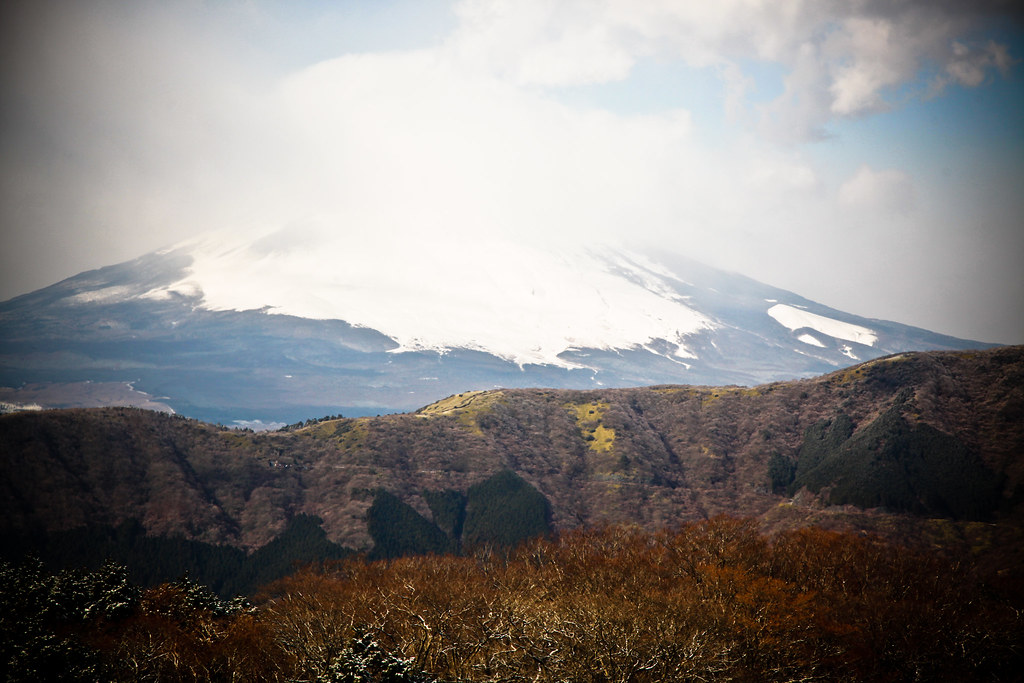

In [108]:
imgs[3683]